<a href="https://colab.research.google.com/github/Risskr/Stock-App/blob/Simplified/StocksApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Up**


In [1]:
# #refesh python script
# get_ipython().kernel.do_shutdown(restart=True)

# #Check GPUs
# !nvidia-smi

#load cudf to use GPUs for analysis
#%load_ext cudf.pandas

# import pandas
import pandas as pd
import datetime
import pickle
import numpy as np
from tqdm.notebook import tqdm

#!pip install tqdm==4.66.1

# **Examples**

## Example how to locate in dataframes and in sereies

In [ ]:
# GOOGDailyClose_Series = GOOGDailyClose['close']

#Dataframe example
# x = GOOGDailyClose.loc[('GOOG', 2020, 1, 2), 'close']
# print(x)

#Series Example
# y = GOOGDailyClose_Series.loc[('GOOG', 2020, 1, 2)]
# print(y)

## Example graph

In [ ]:
# # from matplotlib import pyplot as plt
# # GOOGDailyClose['close'].plot(kind='line', figsize=(8, 4), title='close')
# # plt.gca().spines[['top', 'right']].set_visible(False)

# from matplotlib import pyplot as plt

# # Create the plot for GOOGDailyClose
# ax = GOOGDailyClose['close'].plot(kind='line', figsize=(8, 4), title='Closing Stock Prices')

# # Add the plot for MSFTDailyClose to the same axes
# MSFTDailyClose['close'].plot(kind='line', ax=ax)

# # Hide the top and right spines
# plt.gca().spines[['top', 'right']].set_visible(False)

# # Add a legend to distinguish the lines
# plt.legend(['GOOG', 'MSFT'])

## Example Call Function from another file
Eample Call Correlation_Coefficient function from another My Drive file

In [ ]:
# %run "/content/drive/My Drive/Colab Notebooks/Correlation_Coefficient.ipynb"

# Correlation_Coefficient(GOOGDailyClose, MSFTDaily Close)


# **Get Stock Data**

## Function: Download Stock Data to My Drive

In [ ]:
def DownloadStockData():
  #Download the stock data
  !if [ ! -f "usa_stocks_30m.parquet" ]; then curl https://storage.googleapis.com/rapidsai/colab-data/usa_stocks_30m.parquet -o usa_stocks_30m.parquet; else echo "usa_stocks_30m.parquet found"; fi

  #move the stock data to my Drive
  !mv usa_stocks_30m.parquet "/content/drive/MyDrive/Colab Notebooks"

## Function: Import Stock Data from My Drive

In [ ]:
def ImportStockData():
  # Import the stock data from My Drive
  # Define nasdaq_stocks as the stock data
  # Specify the full path to the file in your Google Drive
  nasdaq_stocks = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/usa_stocks_30m.parquet")
  return nasdaq_stocks


## Function: Manipulate raw stock data for correlation funciton

In [ ]:
def ManipulateStockData(nasdaq_stocks):
  #add year, month, and day columns
  #df[["year", "week", "day"]] = df.datetime.dt.isocalendar()
  nasdaq_stocks["year"] = nasdaq_stocks.datetime.dt.year
  nasdaq_stocks["month"] = nasdaq_stocks.datetime.dt.month
  nasdaq_stocks["day"] = nasdaq_stocks.datetime.dt.day

  # Filter the DataFrame based on the 'year' column
  stock_TimeFiltered = nasdaq_stocks.loc[nasdaq_stocks['year'] >= 2023]

  #stock_TimeFiltered.info()
  #stock_TimeFiltered.head()

  #aggregate data by ticker, month, day, closing cost.
  stock_TimeFiltered_aggregated_close = stock_TimeFiltered.groupby(["ticker", "year", "month", "day"]).agg({"close": "last"})

  #stock_TimeFiltered_aggregated_close.info()
  #stock_TimeFiltered_aggregated_close.head()
  return stock_TimeFiltered_aggregated_close

## Functions: Export/Import variables to My Drive

In [ ]:
def export_variable(variable_name, file_name):

  now = datetime.datetime.now()

  save_path = f"/content/drive/MyDrive/Colab Notebooks/{file_name}_{now}.parquet"

  try:
      variable_name.to_parquet(save_path)
      print(f"Successfully saved the variable to {save_path}")
  except Exception as e:
      print(f"An error occurred while saving the file: {e}")
  return

# # use this line to run the function
# export_variable(lagged_correlations, "lagged_correlation")

In [2]:
def import_variable(file_name):
  load_path = f"/content/drive/MyDrive/Colab Notebooks/{file_name}"

  try:
      variable = pd.read_parquet(load_path)

      print(f"Successfully loaded data from {load_path}")

  except FileNotFoundError:
      print(f"Error: The file was not found at {load_path}")
  except Exception as e:
      print(f"An error occurred while loading the file: {e}")
  return variable

# #run this funciton with this line
# x = import_variable("testing2_2025-05-22 19:07:29.595379.parquet")

# **Correlation Coefficent funtions**

## Function: Correlation_Coefficient with Lag for two stocks

In [ ]:
# Correlation_Coefficient Function with Lag
# Using the Pearson correlation coefficient to determine correlation between two stocks with a lag

def Correlation_Coefficient_Lag(StockA, StockB, k=0):
  # Calculate the correlation between the 'close' columns with a lag
  StockA_series = StockA['close'].droplevel('ticker')
  StockB_series = StockB['close'].droplevel('ticker')

  # Apply the lag to StockB
  # Shift the StockB series down by k periods.
  # Positive k shifts data points forward, filling early entries with NaN.
  # Negative k shifts data points backward, filling late entries with NaN.
  StockB_lagged = StockB_series.shift(k)

  # Calculate the correlation between the original StockA and the lagged StockB
  # The .corr() method automatically handles NaN values by excluding them
  correlation = StockA_series.corr(StockB_lagged)

  return correlation

# # Example usage with a lag of k=1 day
# correlation_value_lag1 = Correlation_Coefficient_Lag(GOOGDailyClose, MSFTDailyClose, k=1)
# print(f"The Pearson correlation coefficient between GOOG and MSFT with a 1-day lag on MSFT is: {correlation_value_lag1}")

# # Example usage with a lag of k=-1 day
# correlation_value_lag_neg1 = Correlation_Coefficient_Lag(GOOGDailyClose, MSFTDailyClose, k=-1)
# print(f"The Pearson correlation coefficient between GOOG and MSFT with a -1-day lag on MSFT is: {correlation_value_lag_neg1}")

# # Example usage with no lag (k=0)
# correlation_value_lag0 = Correlation_Coefficient_Lag(GOOGDailyClose, MSFTDailyClose, k=0)
# print(f"The Pearson correlation coefficient between GOOG and MSFT with no lag is: {correlation_value_lag0}")

## Function: Sample GOOG and MSFT Correlation

In [ ]:
def GOOG_MSFT():
  # Access the 'ticker' level from the index for filtering
  GOOGDailyClose = stock_TimeFiltered_aggregated_close.loc[stock_TimeFiltered_aggregated_close.index.get_level_values('ticker') == "GOOG"]
  MSFTDailyClose = stock_TimeFiltered_aggregated_close.loc[stock_TimeFiltered_aggregated_close.index.get_level_values('ticker') == "MSFT"]

  GOOGDailyClose.info()
  GOOGDailyClose.head()

# Correlation_Coefficient Function
# Using the Pearson correlation coefficient to determine correlation between two stocks

def Correlation_Coefficient_testing(StockA, StockB):
  # Calculate the correlation between the 'close' columns
  StockA = StockA['close'].droplevel('ticker')
  StockB = StockB['close'].droplevel('ticker')
  correlation = StockA.corr(StockB)
  return correlation

  correlation_value = Correlation_Coefficient_testing(GOOGDailyClose, MSFTDailyClose)
  print(f"The Pearson correlation coefficient between GOOG and MSFT is: {correlation_value}")

## Function: Correlation Coeficient for entire stock data set

In [ ]:
def calculate_lagged_correlation(df, end_date, lag_days=1):
  # import pandas as pd
  # import numpy as np
  # from tqdm.notebook import tqdm # Import tqdm
  """
  Calculates the pairwise Pearson correlation coefficient between all stocks
  in a DataFrame for a specified 6-month period with a given lag.

  Args:
    df: DataFrame with a MultiIndex (ticker, year, month, day) and 'close' column.
    end_date: The end date (inclusive) of the 6-month period as a string 'YYYY-MM-DD'.
    lag_days: The number of days to lag the second stock's data.

  Returns:
    A pandas DataFrame containing the pairwise correlation coefficients.
  """
  # Convert end_date to datetime object
  end_datetime = pd.to_datetime(end_date)

  # Calculate the start date for the 6-month period
  start_datetime = end_datetime - pd.DateOffset(months=6)

  # Filter the DataFrame for the specified date range
  # We need to create a datetime column from the index to filter
  df['datetime'] = pd.to_datetime(df.index.get_level_values('year').astype(str) + '-' +
                                   df.index.get_level_values('month').astype(str) + '-' +
                                   df.index.get_level_values('day').astype(str))
  filtered_df = df[(df['datetime'] >= start_datetime) & (df['datetime'] <= end_datetime)]
  filtered_df = filtered_df.drop(columns=['datetime']) # Drop the temporary datetime column


  # Get unique tickers in the filtered data
  tickers = filtered_df.index.get_level_values('ticker').unique()

  # Create an empty DataFrame to store correlation results
  correlation_matrix = pd.DataFrame(index=tickers, columns=tickers, dtype=float)

  # Iterate through all pairs of tickers with a progress bar
  for ticker_a in tqdm(tickers, desc="Calculating correlations"): # Add tqdm here

    # Extract data for each ticker
    stock_a_data = filtered_df.loc[ticker_a, 'close']

    for ticker_b in tickers:
      if ticker_a != ticker_b:
        # Extract data for each ticker
        stock_b_data = filtered_df.loc[ticker_b, 'close']

        # Align the dataframes based on the date index
        aligned_data = pd.merge(stock_a_data.reset_index(), stock_b_data.reset_index(),
                                on=['year', 'month', 'day'], how='inner', suffixes=('_A', '_B'))
        aligned_data['datetime'] = pd.to_datetime(aligned_data['year'].astype(str) + '-' +
                                                  aligned_data['month'].astype(str) + '-' +
                                                  aligned_data['day'].astype(str))
        aligned_data = aligned_data.set_index('datetime').sort_index()

        # Apply the lag to stock_b_data
        lagged_stock_b_data = aligned_data['close_B'].shift(lag_days)

        # Calculate correlation, dropping NaN values
        correlation = aligned_data['close_A'].corr(lagged_stock_b_data)

        # Store the correlation in the matrix
        correlation_matrix.loc[ticker_a, ticker_b] = correlation

  return correlation_matrix

# Example usage:
# Assuming 'stock_TimeFiltered_aggregated_close' is your aggregated stock data
# and you want to calculate correlations ending on '2023-12-31' with a 1-day lag.
# Replace 'stock_TimeFiltered_aggregated_close' with the actual name of your DataFrame.
# end_date = '2023-12-31'
# lagged_correlations = calculate_pairwise_lagged_correlation(stock_TimeFiltered_aggregated_close, end_date, lag_days=1)

# Display the correlation matrix
# print(lagged_correlations)

# To access the correlation between specific stocks, e.g., GOOG and MSFT:
# print(lagged_correlations.loc['GOOG', 'MSFT'])

# **Run Fucntions**

In [3]:
# #import Stock data from MyDrive
# nasdaq_stocks = ImportStockData()

# #Manipulate the raw stock data for my correlation function
# stock_TimeFiltered_aggregated_close = ManipulateStockData(nasdaq_stocks)

# $ enter end date and run correlation function on entire stock data. This will take a couple of hours
# end_date = '2023-12-31'
# lagged_correlations = calculate_lagged_correlation(stock_TimeFiltered_aggregated_close, end_date, lag_days=1)

# import correlation data from entire stock data that I saved off earlier on MyDrive
sixMonth_correlation_data = import_variable("6month_correlation_data.parquet")

Successfully loaded data from /content/drive/MyDrive/Colab Notebooks/6month_correlation_data.parquet


In [4]:
sixMonth_correlation_data.head()

ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZS,ZTS
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,0.436758,0.757819,0.288543,0.607573,0.809978,-0.538292,0.796953,0.404781,0.842058,...,0.525649,-0.557427,0.368325,0.821145,0.552922,0.430932,0.531129,0.765019,0.574620,0.781411
AAL,0.452222,NaN,0.478573,-0.163185,0.585997,0.786411,-0.640565,0.064239,-0.441841,0.713112,...,0.562134,-0.206805,0.887095,0.736120,0.867612,0.947020,0.914810,-0.000202,-0.315867,0.291796
AAPL,0.710954,0.442058,NaN,-0.216552,0.473942,0.682018,-0.230604,0.722727,0.491655,0.789603,...,0.727525,-0.763722,0.204642,0.864476,0.534349,0.489626,0.497019,0.448326,0.562604,0.445853
ABBV,0.372804,-0.105593,-0.131037,NaN,0.415187,0.146274,-0.395282,0.282598,0.037046,0.148404,...,-0.256691,0.266532,0.133924,-0.056698,-0.096285,-0.128934,0.000503,0.670791,0.217431,0.647417
ABNB,0.613458,0.621719,0.559474,0.281844,NaN,0.750441,-0.493802,0.467323,0.008323,0.768117,...,0.424643,-0.092379,0.644370,0.631221,0.612729,0.693432,0.698900,0.504298,0.144670,0.644826


In [5]:
def get_most_correlated_tickers_with_sign(correlation_matrix, z_threshold=1.5):
  """
  Identifies the most correlated tickers for each ticker in a correlation matrix
  using a dynamic threshold based on the mean and standard deviation of absolute
  correlations for each ticker, and includes the original correlation sign.

  Args:
    correlation_matrix: A pandas DataFrame where both index and columns are tickers,
                        and values are correlation coefficients.
    z_threshold: The number of standard deviations from the mean to use as the threshold.

  Returns:
    A pandas DataFrame where the index is tickers and the values are lists of
    (ticker, correlation_coefficient) tuples for the most correlated tickers,
    with the original sign of the correlation coefficient preserved.
  """
  most_correlated_df = pd.DataFrame(index=correlation_matrix.index, columns=['most_correlated'])

  for ticker in correlation_matrix.index:
    # Get the correlation series for the current ticker
    ticker_correlations = correlation_matrix.loc[ticker].drop(ticker) # Exclude self-correlation

    # Calculate mean and standard deviation of absolute correlations
    abs_correlations = ticker_correlations.abs()
    mean_abs_corr = abs_correlations.mean()
    std_abs_corr = abs_correlations.std()

    # Define the dynamic threshold
    dynamic_threshold = mean_abs_corr + (z_threshold * std_abs_corr)

    # Filter for correlations above the dynamic threshold (in absolute value)
    # We still filter based on the absolute value to find strong correlations
    highly_correlated_abs = abs_correlations[abs_correlations > dynamic_threshold]

    # Get the original correlation values for the highly correlated tickers
    highly_correlated = ticker_correlations.loc[highly_correlated_abs.index]


    # Store the results as a list of tuples, preserving the original sign
    most_correlated_list = [(other_ticker, highly_correlated.loc[other_ticker]) for other_ticker in highly_correlated.index]
    most_correlated_df.loc[ticker, 'most_correlated'] = most_correlated_list

  return most_correlated_df



In [6]:
# Example usage with your loaded correlation data:
# Assuming sixMonth_correlation_data is already loaded
most_correlated_stocks_with_sign = get_most_correlated_tickers_with_sign(sixMonth_correlation_data)

# Display the resulting DataFrame
print(most_correlated_stocks_with_sign)

                                          most_correlated
ticker                                                   
A       [(BA, 0.9381780687124879), (BAC, 0.92726986591...
AAL     [(DAL, 0.9650509864724475), (KVUE, 0.954373478...
AAPL    [(ASML, 0.8777334013608582), (BALL, 0.91797780...
ABBV    [(ADP, 0.5560161838991267), (BALL, 0.535657339...
ABNB    [(BALL, 0.8881637780138035), (FIS, 0.812539495...
...                                                   ...
ZBH     [(AAL, 0.9458835068084558), (BALL, 0.939787929...
ZBRA    [(HCA, 0.9441286488789773), (ROP, 0.9534806501...
ZION    [(AMP, 0.8662669489294756), (APH, 0.8624933168...
ZS      [(AIG, 0.9101897391463175), (ALL, 0.8865578236...
ZTS     [(A, 0.8246457985783444), (AME, 0.821511266599...

[510 rows x 1 columns]


In [13]:
def get_most_correlated_tickers_long_format(correlation_matrix, z_threshold=2):
  """
  Identifies the most correlated tickers for each ticker in a correlation matrix
  using a dynamic threshold and returns results in a long format DataFrame.

  Args:
    correlation_matrix: A pandas DataFrame where both index and columns are tickers,
                        and values are correlation coefficients.
    z_threshold: The number of standard deviations from the mean to use as the threshold.

  Returns:
    A pandas DataFrame with columns 'ticker_a', 'ticker_b', and 'correlation_coefficient'
    for the most correlated pairs.
  """
  correlated_pairs = []

  for ticker in correlation_matrix.index:
    # Get the correlation series for the current ticker
    ticker_correlations = correlation_matrix.loc[ticker].drop(ticker) # Exclude self-correlation

    # Calculate mean and standard deviation of absolute correlations
    abs_correlations = ticker_correlations.abs()
    mean_abs_corr = abs_correlations.mean()
    std_abs_corr = abs_correlations.std()

    # Define the dynamic threshold
    dynamic_threshold = mean_abs_corr + (z_threshold * std_abs_corr)

    # Filter for correlations above the dynamic threshold (in absolute value)
    highly_correlated_abs = abs_correlations[abs_correlations > dynamic_threshold]

    # Get the original correlation values for the highly correlated tickers
    highly_correlated = ticker_correlations.loc[highly_correlated_abs.index]

    # Append correlated pairs to the list
    for other_ticker, correlation in highly_correlated.items():
      correlated_pairs.append({'ticker_a': ticker, 'ticker_b': other_ticker, 'correlation_coefficient': correlation})

  return pd.DataFrame(correlated_pairs)

# Example usage:
most_correlated_stocks_long = get_most_correlated_tickers_long_format(sixMonth_correlation_data)

# Display the long format DataFrame
print(most_correlated_stocks_long.head())

  ticker_a ticker_b  correlation_coefficient
0     ABBV     BKNG                 0.630420
1     ABBV      BXP                 0.637487
2     ABBV     CARR                 0.600519
3     ABBV      CAT                 0.791159
4     ABBV     CINF                 0.670370


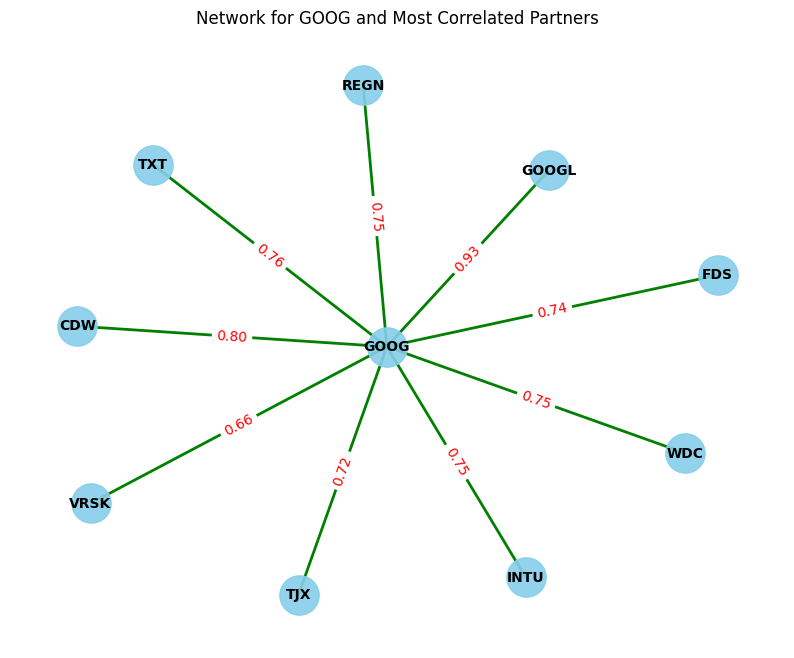

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np # Import numpy for handling potential NaN values or transformations

def plot_ticker_network(correlated_data, target_ticker):
  """
  Plots a network graph for a specific ticker and its most correlated partners.
  The distance between nodes is proportional to the inverse of the absolute correlation.

  Args:
    correlated_data: DataFrame with columns 'ticker_a', 'ticker_b', 'correlation_coefficient'.
    target_ticker: The ticker for which to generate the network graph.
  """
  # Filter the data to include only connections involving the target ticker
  ticker_connections = correlated_data[(correlated_data['ticker_a'] == target_ticker) |
                                     (correlated_data['ticker_b'] == target_ticker)].copy()

  # Create a graph
  # Add the absolute correlation as an edge attribute named 'weight' for spring_layout
  G = nx.from_pandas_edgelist(ticker_connections,
                              'ticker_a', 'ticker_b', ['correlation_coefficient'])

  # Add the absolute correlation as the 'weight' attribute for spring_layout
  # We use the absolute value because spring_layout interprets higher weights as stronger connections
  # and pulls nodes closer.
  for u, v, d in G.edges(data=True):
      d['weight'] = abs(d['correlation_coefficient'])
      # Handle potential NaN weights if any correlations were NaN
      if np.isnan(d['weight']):
          d['weight'] = 0.1 # Assign a small weight if correlation is NaN, adjust as needed

  # Customize graph visualization
  plt.figure(figsize=(10, 8))
  # Use the 'weight' attribute for spring_layout. Higher weight means stronger pull (closer).
  pos = nx.spring_layout(G, k=0.8, weight='weight')  # Use the absolute correlation as weight [1]

  # Draw nodes
  nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', alpha=0.9)

  # Draw edges and color based on correlation sign
  edge_colors = ['red' if data['correlation_coefficient'] < 0 else 'green' for u, v, data in G.edges(data=True)]
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

  # Draw labels
  nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

  # Draw edge labels (correlation values)
  edge_labels = nx.get_edge_attributes(G, 'correlation_coefficient')
  # Format edge labels to 2 decimal places
  formatted_edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_color='red')

  plt.title(f'Network for {target_ticker} and Most Correlated Partners')
  plt.axis('off') # Hide axes
  plt.show()

# Example usage (assuming most_correlated_stocks_long is your long format DataFrame)
plot_ticker_network(most_correlated_stocks_long, 'GOOG') # Replace 'GOOG' with the ticker you want to visualize

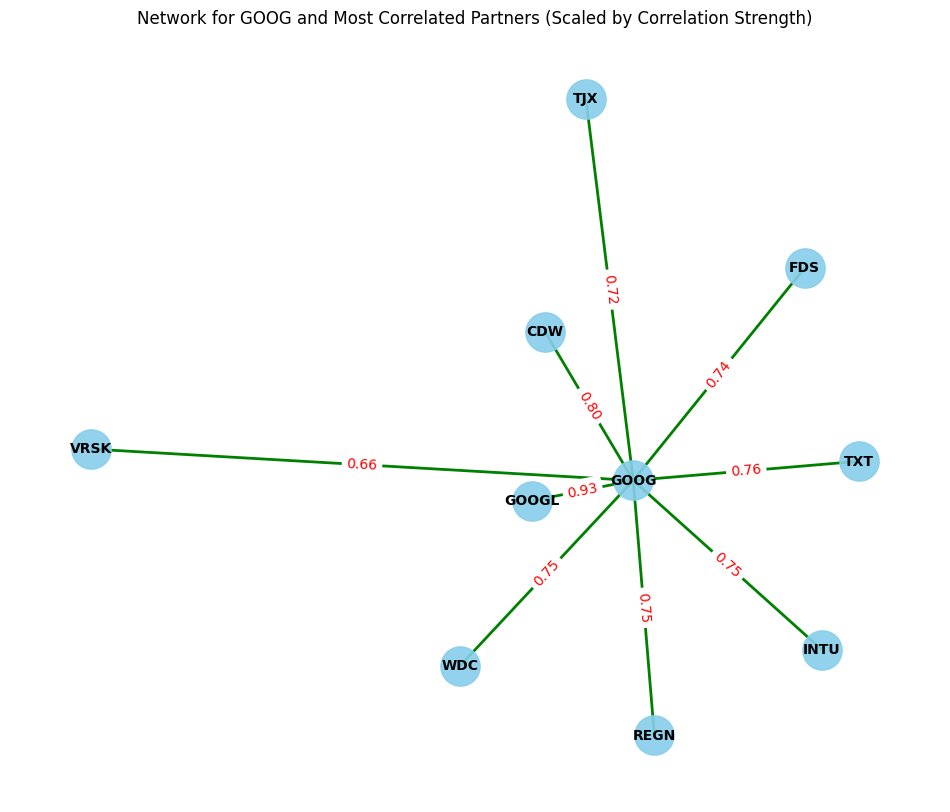

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd # Make sure pandas is imported

def plot_ticker_network(correlated_data, target_ticker):
  """
  Plots a network graph for a specific ticker and its most correlated partners.
  The distance between nodes is proportional to the inverse of the absolute correlation,
  scaled based on the distribution of correlations for the target ticker.

  Args:
    correlated_data: DataFrame with columns 'ticker_a', 'ticker_b', 'correlation_coefficient'.
    target_ticker: The ticker for which to generate the network graph.
  """
  # Filter the data to include only connections involving the target ticker
  ticker_connections = correlated_data[(correlated_data['ticker_a'] == target_ticker) |
                                     (correlated_data['ticker_b'] == target_ticker)].copy()

  # Calculate absolute correlations for scaling
  ticker_connections['abs_correlation'] = ticker_connections['correlation_coefficient'].abs()

  # Handle cases where there are no connections found
  if ticker_connections.empty:
      print(f"No significant correlations found for ticker {target_ticker} within the provided data.")
      return

  # Calculate mean and standard deviation of absolute correlations within this subset
  mean_abs_corr_subset = ticker_connections['abs_correlation'].mean()
  std_abs_corr_subset = ticker_connections['abs_correlation'].std()

  # Create a graph
  G = nx.from_pandas_edgelist(ticker_connections,
                              'ticker_a', 'ticker_b', ['correlation_coefficient', 'abs_correlation'])

  # Add a scaled weight attribute for spring_layout
  # We use a transformation that assigns higher weights to higher absolute correlations
  # relative to the mean/std dev of the subset.
  # Transformation: (absolute_correlation - mean) / std_dev + 1 (add 1 to ensure positive weights)
  # If std_dev is zero (e.g., all correlations are the same), just use absolute value or a small constant.
  scaled_weights = {}
  for u, v, d in G.edges(data=True):
      abs_corr = d['abs_correlation']
      if std_abs_corr_subset > 0:
          # Scale the absolute correlation relative to the mean and std dev of the subset
          scaled_weight = (abs_corr - mean_abs_corr_subset) / std_abs_corr_subset + 1
          # Ensure weight is positive and has a minimum value (e.g., 0.1 or 0.5)
          d['weight'] = max(0.1, scaled_weight)
      else:
          # If std dev is 0, use the absolute correlation directly as weight (or a default)
          d['weight'] = max(0.1, abs_corr)

      # Handle potential NaN weights (shouldn't happen if abs_correlation is calculated correctly, but good practice)
      if np.isnan(d['weight']):
          d['weight'] = 0.1

  # Customize graph visualization
  plt.figure(figsize=(12, 10))
  # Use the calculated 'weight' attribute for spring_layout. Higher weight means stronger pull (closer).
  # Adjust k for overall spacing, iterations for convergence.
  pos = nx.spring_layout(G, k=0.5, weight='weight', iterations=100) # Use the scaled weight

  # Draw nodes
  nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', alpha=0.9)

  # Draw edges and color based on correlation sign
  edge_colors = ['red' if data['correlation_coefficient'] < 0 else 'green' for u, v, data in G.edges(data=True)]
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

  # Draw labels
  nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

  # Draw edge labels (correlation values)
  # Ensure we get the original correlation_coefficient for the label
  edge_labels = {(u, v): data['correlation_coefficient'] for u, v, data in G.edges(data=True)}
  # Format edge labels to 2 decimal places
  formatted_edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_color='red')

  plt.title(f'Network for {target_ticker} and Most Correlated Partners (Scaled by Correlation Strength)')
  plt.axis('off') # Hide axes
  plt.show()

# Example usage (assuming most_correlated_stocks_long is your long format DataFrame)
plot_ticker_network(most_correlated_stocks_long, 'GOOG') # Replace 'GOOG' with the ticker you want to visualize